# Scenario 5:
A military organization wants to develop a machine learning model that can identify enemy
vehicles in satellite imagery. The model will take as input a satellite image and output a list
of bounding boxes that correspond to the location of enemy vehicles in the image. Develop
a ML solution for the aforesaid scenario with an example Dataset. bold text

In [2]:
! pip install tensorflow

Import Required Packages

In [3]:
import tensorflow as tf
import tensorflow.keras.losses as losses
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import tensorflow.keras.optimizers as optimizers
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import time
#LOG_DIR = f"{int(time.time())}"
from keras.layers import BatchNormalization
from tempfile import TemporaryFile
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow.keras.regularizers as regularizers
import cv2
import random
from PIL import Image
import matplotlib.patches as patches
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from google.colab import drive
import time

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.0 MB/s eta 0:00:00


<ipython-input-3-397be5799211>:9: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [7]:
dataset_dir = "/content/drive/MyDrive/Aircraft/Adataset/" #dataset folder


In [8]:
import os

In [9]:
class_names = os.listdir('/content/drive/MyDrive/Aircraft/Adataset/') # Each Class have separate folder

In [10]:
class_names # class Names of Military Aircraft

['B-2', 'B-52', 'C-135', 'B-1', 'BareLand', 'C-130', 'C-17', 'C-5']

# Data preprocess(setting is size)

5026
2


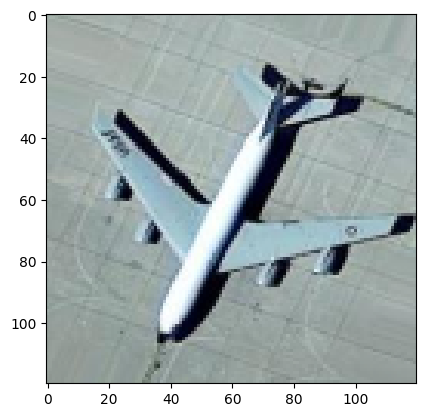

In [11]:
RESIZE_VALUE = 120
train_data = []
test_data = []


for type in class_names :
  selected_path = dataset_dir + type
  class_num = class_names.index(type)
  for img in os.listdir(selected_path):
    try:
      image = Image.open(os.path.join(selected_path,img))
      img_array = np.array(image)
      aircraft_img = cv2.resize(img_array, (RESIZE_VALUE, RESIZE_VALUE))
      train_data.append([aircraft_img, class_num])
    except Exception as e:
      print("error:",selected_path,image)


random.shuffle(train_data)
print(len(train_data))
print(train_data[0][1])

plt.imshow(train_data[0][0])

Total No of Images:  5026
Class number of below Image:  2
Class number of  Name Image:  C-135


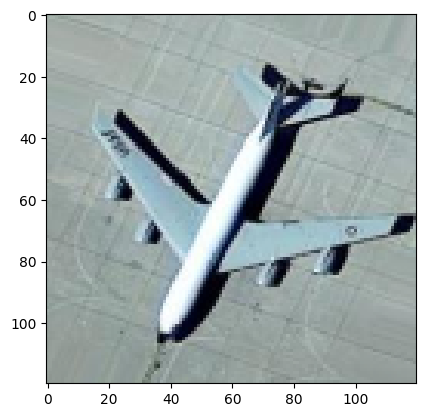

In [12]:
print("Total No of Images: ", len(train_data))

print("Class number of below Image: ",train_data[0][1])
print("Class number of  Name Image: ",class_names[train_data[0][1]])
plt.imshow(train_data[0][0])

The line cv2.COLOR_BGRA2BGR is used to convert an image from BGRA (Blue, Green, Red, Alpha) format to BGR (Blue, Green, Red) format

In [13]:
for x in range(len(train_data)):
  if (train_data[x][0].shape[2] == 4):
    train_data[x][0] = cv2.cvtColor(train_data[x][0], cv2.COLOR_BGRA2BGR)

In [14]:
x_train = []
y_train = []

#x_test = []
#y_test = []

#for data, label in testing_data:
#  x_test.append(data)
#  y_test.append(label)

for data, label in train_data:
  x_train.append(data)
  y_train.append(label)

x_train = np.asarray(x_train)
x_train = np.array(x_train).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
y_train = np.asarray(y_train)

#x_test = np.asarray(x_test)
#x_test = np.array(x_test).reshape(-1, RESIZE_VALUE, RESIZE_VALUE, 3)
#y_test = np.asarray(y_test)

x_train = x_train / 255
#x_test = x_test / 255
print(len(x_train))
#print(len(x_test))

5026


# Splitting the dataset

In [15]:
# Model Creation

In [16]:
def Model():
    # main model
    model = Sequential()
    model.add(Conv2D(32, (3, 3), input_shape = (RESIZE_VALUE,RESIZE_VALUE,3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))



    model.add(Flatten())

    model.add(Dense(450))
    model.add(Activation('relu'))
    model.add(Dropout(.65))

    model.add(Dense(len(class_names)))
    model.add(Activation("softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(loss='sparse_categorical_crossentropy',
                    optimizer=opt,
                    metrics=['acc'])

    return model

In [17]:
model = Model()
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 activation (Activation)     (None, 118, 118, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 activation_1 (Activation)   (None, 57, 57, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                 

In [26]:
epochs = 100
history_ = model.fit(x_train, y_train, epochs=epochs, validation_split=.30, batch_size=64,callbacks=[callback])

Epoch 1/100
55/55 [==============================] - 2s 37ms/step - loss: 1.6903 - acc: 0.3644 - val_loss: 1.5559 - val_acc: 0.3966
Epoch 2/100
55/55 [==============================] - 2s 34ms/step - loss: 1.4524 - acc: 0.4574 - val_loss: 1.3039 - val_acc: 0.5836
Epoch 3/100
55/55 [==============================] - 2s 32ms/step - loss: 1.2553 - acc: 0.5489 - val_loss: 1.1433 - val_acc: 0.6267
Epoch 4/100
55/55 [==============================] - 2s 33ms/step - loss: 1.0950 - acc: 0.6111 - val_loss: 0.9655 - val_acc: 0.7042
Epoch 5/100
55/55 [==============================] - 2s 33ms/step - loss: 0.9510 - acc: 0.6669 - val_loss: 0.8482 - val_acc: 0.7082
Epoch 6/100
55/55 [==============================] - 2s 32ms/step - loss: 0.8339 - acc: 0.7089 - val_loss: 0.7315 - val_acc: 0.7599
Epoch 7/100
55/55 [==============================] - 2s 33ms/step - loss: 0.7370 - acc: 0.7490 - val_loss: 0.6592 - val_acc: 0.7865
Epoch 8/100
55/55 [==============================] - 2s 34ms/step - loss: 0.

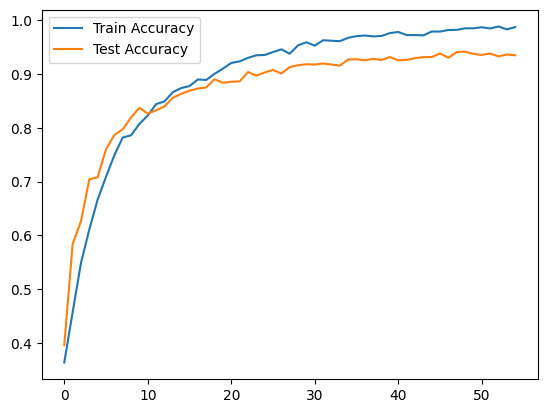

In [29]:
plt.plot(range(55),history_.history['acc'], label = "Train Accuracy")
plt.plot(range(55),history_.history['val_acc'], label = "Test Accuracy")
plt.legend()

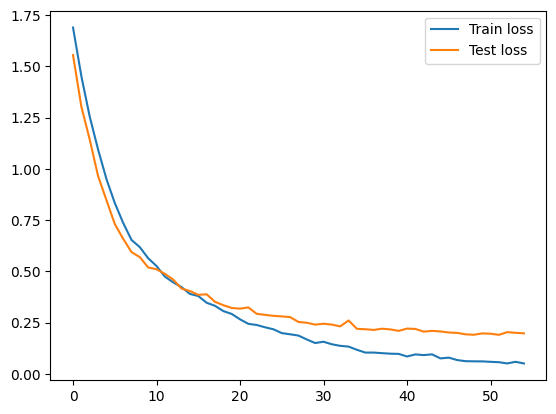

In [30]:
plt.plot(range(55),history_.history['loss'], label = "Train loss")
plt.plot(range(55),history_.history['val_loss'], label = "Test loss")
plt.legend()

In [32]:
model.save("/content/drive/MyDrive/Aircraft/","Trained_model1")

In [57]:
def DetectAirCraft(path):
    #function takes a wide picture consisting of multiple aircrafts and marks aircrafts

    image = Image.open(path)
    img_array = np.array(image)
    img_shape = img_array.shape
    aircraft_img = cv2.resize(img_array, (img_shape[1], img_shape[0]))
    test_img =  cv2.cvtColor(aircraft_img, cv2.COLOR_BGRA2BGR)
    plt.imshow(test_img)
    ax = plt.gca()
    pred_dist = np.arange(len(class_names))
    classif = []
    detectCount = 0;
    counter = 0
    # set length and width of patch
    length = 80
    width = 80

    # Dont want to mark empty land
    dshow = ["BareLand"]

    # iterate through the entire image and predict each patch
    for i in range(0,test_img.shape[0], 30):
      for j in range (0,test_img.shape[1], 30):
        if (j+length < test_img.shape[1] and i+width < test_img.shape[0]):
          raw_patch = test_img[i:i+length, j:j+width]
          aircraft_img = cv2.resize(raw_patch, (RESIZE_VALUE, RESIZE_VALUE))
          patch = np.expand_dims(aircraft_img, axis=0)
          ident = model.predict(patch)
          ident = np.argmax(ident,axis=1)
          pred_dist[ident[0]] += 1
          u = class_names[ident[0]]
          # do not mark patch if patch is classified as bareland (background)
          if (u not in dshow):
            # mark the identified patch with a red rectangle ROI, region of interest

            ax.add_patch(patches.Rectangle((j, i), (j+length)-j, (i+width)-i, facecolor='none',edgecolor='red', linewidth=1.5))

            plt.text(j, i, u, color='blue')
    plt.show()

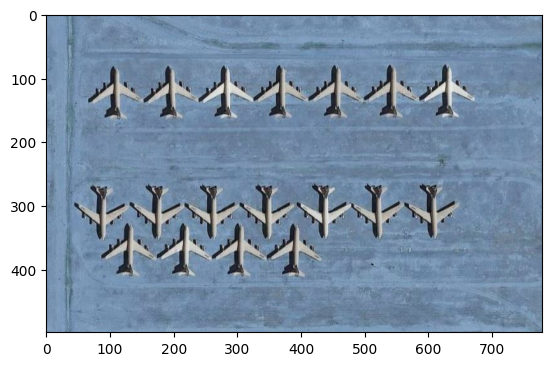

In [58]:
path = "/content/1.JPG"
im = cv2.imread(path)
plt.imshow(im)

## Detecting Military Aircrafts

1/1 [==============================] - 0s 19ms/step


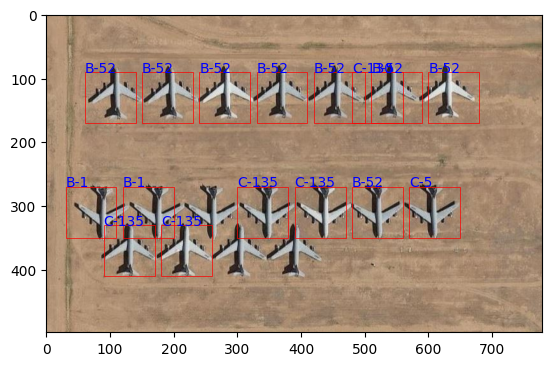

In [56]:
DetectAirCraft(path)